# Analyze SoHappy output files
This scripts analyse the fits file produced with SoHappy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\astropy\config\configuration.py:541: ConfigurationMissingWarning: Configuration defaults will be used due to FileExistsError:17 on None
  warn(ConfigurationMissingWarning(msg))


In [2]:
def hist1d(var,axis,bins,title="",legend="",xlabel="",ylabel="",alpha=1,stat=True,histtype="bar"):
    if (stat==True):
        legend = legend + "\nEntries: " + str(len(var)) +"\n" \
                    +"Mean   : " + str(round(np.mean(var),2)) + "\n" \
                    +"RMS    : " + str(round(np.std(var),2))

    plt.hist(var,bins=nbin,label=legend,alpha=alpha,histtype=histtype)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    plt.legend()
    return

In [3]:
def ConvertAsciiToFits(txtfile_noext):
    data = Table.read(txtfile_noext+".txt",format="ascii")
    data.write(txtfile_noext+'_converted.fits', format="fits",overwrite="True")
    print(" <<<<<<<< Converted >>>>>>>>")

In [4]:
def GetData(file,debug=False):
    data = Table.read(file,format="fits")
    if (debug): print(data)
    return data

### Bricolage

In [5]:
# file = "Result-PseudoPopulation-20deg/PopulationSummary.txt"
# ConvertAsciiToFits(file[:-4])

### Analyze data

In [6]:
# Concatenate files if required
data20 = GetData("Result-PseudoPopulation-20deg/PopulationSummary_Reco1_100s_100iter.fits")
data40 = GetData("Result-PseudoPopulation-40deg/PopulationSummary_Reco1_100s_100iter.fits")
data60 = GetData("Result-PseudoPopulation-60deg/PopulationSummary_Reco1_100s_100iter.fits")
print(len(data20),len(data40),len(data60))
data = vstack([data20, data40, data60])
del data20
del data40
del data60

80 80 80


In [7]:
# Initialize data
name    = data["GRB"]
z       = data["z"]
theta   = data["Zenith"]
sigmax  = data["sigmax"]
nex_max = data["nex_max"]
nb_max  = data["nb_max"]
#t3s     = data["t3s"][data["t3s"]>0] # This changes the dimension of t3s !
t3s     = data["t3s"]
idt3s   = np.where(t3s>0) # If defined
det3s   = data["det3s"]
t5s     = data["t5s"]
idt5s   = np.where(t5s>0) 
det5s   = data["det5s"]  
#print(np.mean(t3s))

In [8]:
len(np.where(t3s>0)[0])

235

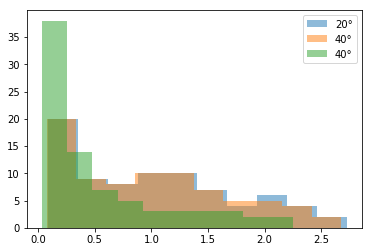

In [9]:
plt.hist(np.log10(sigmax[theta==20]),alpha=0.5,label="20°")
plt.hist(np.log10(sigmax[theta==40]),alpha=0.5,label="40°")
plt.hist(np.log10(sigmax[theta==60]),alpha=0.5,label="40°")
plt.legend()
plt.show()

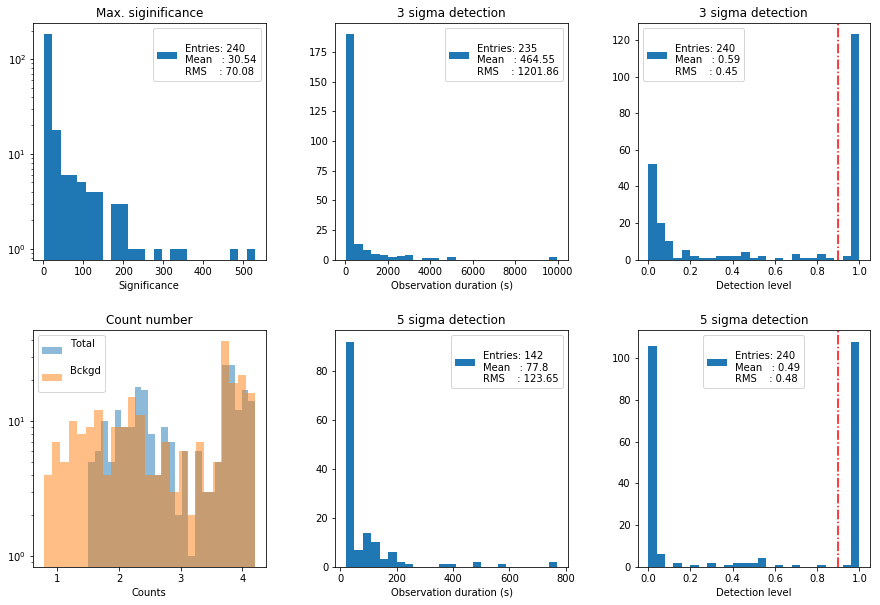

In [10]:
# Indifferantiated lot
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

nbin=25
ax = plt.subplot(231)
ax.semilogy()
hist1d(sigmax,  axis=ax,bins=nbin,xlabel="Significance",ylabel="",title="Max. siginificance")

ax = plt.subplot(232)
hist1d(t3s[idt3s],  axis=ax,bins=nbin,xlabel="Observation duration (s)",ylabel="",title="3 sigma detection")

ax = plt.subplot(233)
hist1d(det3s,axis=ax,bins=nbin,xlabel="Detection level",ylabel="",title="3 sigma detection")
plt.axvline(x=0.9,color="red",linestyle="-.")

ax = plt.subplot(234)
ax.semilogy()
hist1d(np.log10(nex_max+nb_max),axis=ax,bins=10*nbin,xlabel="Log10(Counts)",legend="Total\n",ylabel="",title="Count number",alpha=0.5,stat=False)
hist1d(np.log10(nb_max),axis=ax,bins=10*nbin,xlabel="Counts",legend="Bckgd\n",ylabel="",title="Count number",alpha=0.5,stat=False)
ax = plt.subplot(235)
hist1d(t5s[idt5s],  axis=ax,bins=nbin,xlabel="Observation duration (s)",ylabel="",title="5 sigma detection")

ax = plt.subplot(236)
hist1d(det5s,axis=ax,bins=nbin,xlabel="Detection level",ylabel="",title="5 sigma detection")
plt.axvline(x=0.9,color="red",linestyle="-.")


plt.show()

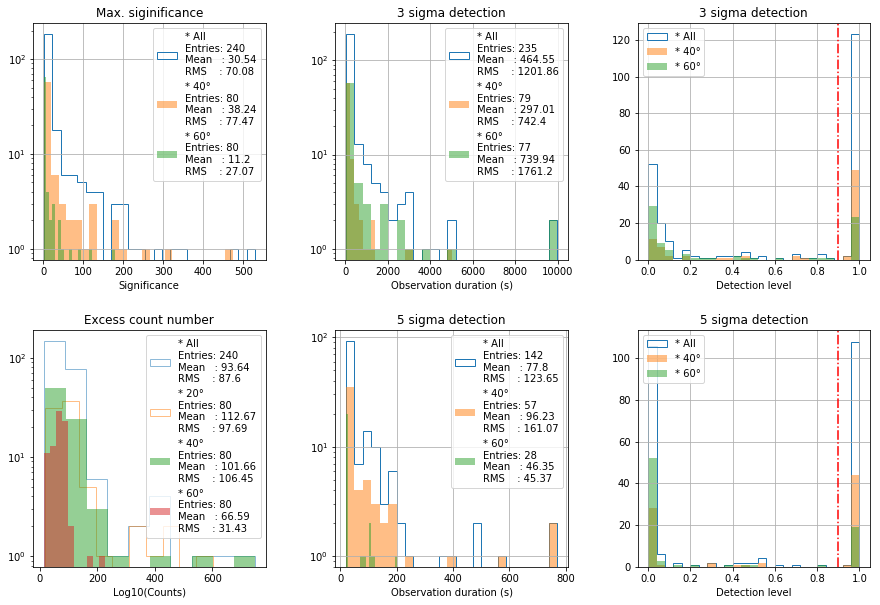

In [11]:
# Differentiated zenith
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

nbin=25
ax = plt.subplot(231)
ax.semilogy()
hist1d(sigmax,             axis=
       ax,bins=nbin,xlabel="Significance",
       ylabel="",legend="* All",title="Max. siginificance",histtype="step")
hist1d(sigmax[theta==40],  axis=ax,bins=nbin,xlabel="Significance",
       ylabel="",legend="* 40°",alpha=0.5,title="Max. siginificance")
hist1d(sigmax[theta==60],  axis=ax,bins=nbin,xlabel="Significance",
       ylabel="",legend="* 60°",alpha=0.5,title="Max. siginificance")
plt.grid()

ax = plt.subplot(232)
ax.semilogy()
hist1d(t3s[idt3s],                    
       axis=ax,bins=nbin,xlabel="Observation duration (s)",
       ylabel="",legend="* All",title="3 sigma detection",histtype="step")
hist1d(t3s[idt3s][theta[idt3s]==40],  
       axis=ax,bins=nbin,xlabel="Observation duration (s)",
       ylabel="",legend="* 40°",alpha=0.5,title="3 sigma detection")
hist1d(t3s[idt3s][theta[idt3s]==60],  
       axis=ax,bins=nbin,xlabel="Observation duration (s)",
       ylabel="",legend="* 60°",alpha=0.5,title="3 sigma detection")
plt.grid()

ax = plt.subplot(233)
hist1d(det3s,axis=ax,bins=nbin,xlabel="Detection level",
       ylabel="",legend="* All",title="3 sigma detection",histtype="step",stat=False)
hist1d(det3s[theta==40],axis=ax,bins=nbin,xlabel="Detection level",
       ylabel="",legend="* 40°",alpha=0.5,title="3 sigma detection",stat=False)
hist1d(det3s[theta==60],axis=ax,bins=nbin,xlabel="Detection level",
       ylabel="",legend="* 60°",alpha=0.5,title="3 sigma detection",stat=False)
plt.grid()
plt.axvline(x=0.9,color="red",linestyle="-.")

ax = plt.subplot(234)
ax.semilogy()

nbin=10
hist1d(nex_max,axis=ax,bins=nbin,xlabel="Counts",legend="* All",
       ylabel="",title="Excess count number",alpha=0.5,stat=True,histtype="step")
hist1d(nex_max[theta==20],axis=ax,bins=nbin,xlabel="Counts",legend="* 20°",
       ylabel="",title="Excess count number",alpha=0.5,stat=True,histtype="step")
hist1d(nex_max[theta==40],axis=ax,bins=nbin,xlabel="Counts",legend="* 40°",
       ylabel="",title="Excess count number",alpha=0.5,stat=True)
hist1d(nex_max[theta==60],axis=ax,bins=nbin,xlabel="Counts",legend="* 60°",
       ylabel="",title="Excess count number",alpha=0.5,stat=True)

nbin=25
ax = plt.subplot(235)
ax.semilogy()
hist1d(t5s[idt5s],                    
       axis=ax,bins=nbin,xlabel="Observation duration (s)",
       ylabel="",legend="* All",title="5 sigma detection",histtype="step")
hist1d(t5s[idt5s][theta[idt5s]==40],  
       axis=ax,bins=nbin,xlabel="Observation duration (s)",
       ylabel="",legend="* 40°",alpha=0.5,title="5 sigma detection")
hist1d(t5s[idt5s][theta[idt5s]==60],  
       axis=ax,bins=nbin,xlabel="Observation duration (s)",
       ylabel="",legend="* 60°",alpha=0.5,title="5 sigma detection")
plt.grid()

ax = plt.subplot(236)
hist1d(det5s,axis=ax,bins=nbin,xlabel="Detection level",
       ylabel="",legend="* All",title="5 sigma detection",histtype="step",stat=False)
hist1d(det5s[theta==40],axis=ax,bins=nbin,xlabel="Detection level",
       ylabel="",legend="* 40°",alpha=0.5,title="5 sigma detection",stat=False)
hist1d(det5s[theta==60],axis=ax,bins=nbin,xlabel="Detection level",
       ylabel="",legend="* 60°",alpha=0.5,title="5 sigma detection",stat=False)
plt.grid()
plt.axvline(x=0.9,color="red",linestyle="-.")


plt.show()